A sample of data is a snapshot from a broader population of all possible observations that
could be taken of a domain or generated by a process. Interestingly, many observations fit a
common pattern or distribution called the normal distribution, or more formally, the Gaussian
distribution. A lot is known about the Gaussian distribution, and as such, there are whole
sub fields of statistics and statistical methods that can be used with Gaussian data. In this
tutorial, you will discover the Gaussian distribution, how to identify fit, and how to calculate
key summary statistics of data drawn from this distribution. After completing this tutorial, you
will know:
   * That the Gaussian distribution describes many observations, including many observations
seen during applied machine learning.
   * That the central tendency of a distribution is the most likely observation and can be
estimated from a sample of data as the mean or median.
   * That the variance is the average deviation from the mean in a distribution and can be
estimated from a sample of data as the variance and standard deviation.

# Tutorial Overview
This tutorial is divided into 6 parts; they are:

    1. Gaussian Distribution
    2. Sample vs Population
    3. Test Dataset
    4. Central Tendencies
    5. Variance
    6. Describing a Gaussian

# 1. Gaussian Distribution: 

A distribution of data refers to the shape it has when you graph it, such as with a histogram.
The most commonly seen and therefore well-known distribution of continuous values is the bell
curve. It is known as the normal distribution, because it the distribution that a lot of data falls
into. It is also known as the Gaussian distribution, more formally, named for Carl Friedrich
Gauss. As such, you will see references to data being normally distributed or Gaussian, which
are interchangeable, both referring to the same thing: that the data looks like the Gaussian
distribution. Some examples of observations that have a Gaussian distribution include:

    * People's heights.
    * IQ scores.
    * Body temperature.

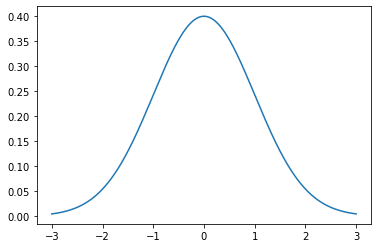

In [1]:
# generate and plot an idealized gaussian
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# y-axis as the gaussian
y_axis = norm.pdf(x_axis, 0, 1)
# plot data
pyplot.plot(x_axis, y_axis)
pyplot.show()

Running the example generates a plot of an idealized Gaussian distribution. The x-axis are
the observations and the y-axis is the likelihood of each observation. In this case, observations
around 0.0 are the most common and observations around -3.0 and 3.0 are rare or unlikely.

It is helpful when data is Gaussian or when we assume a Gaussian distribution for calculating
statistics. This is because the Gaussian distribution is very well understood. So much so that
large parts of the field of statistics are dedicated to methods for this distribution. Thankfully,
much of the data we work with in machine learning often fits a Gaussian distribution. Examples
include the input data we may use to fit a model and the multiple evaluations of a model on
different samples of training data. Not all data is Gaussian, and it is sometimes important to
make this discovery either by reviewing histogram plots of the data or using statistical tests to
check. Some examples of observations that do not fit a Gaussian distribution and instead may
fit an exponential (hockey-stick shape) include:

    * People's incomes.
    * Population of cities.
    * Sales of books.
    
A uniform distribution is another common distribution, often seen when each item or value
has an equal value for being selected. The shape of a graph of the uniform distribution is a 
at
line.

# 2. Sample vs Population:

We can think of data being generated by some unknown process. The data that we collect is
called a data sample, whereas all possible data that could be collected is called the population.

    * Data Sample: A subset of observations from a group.
    * Data Population: All possible observations from a group.
    
This is an important distinction because dierent statistical methods are used on samples vs
populations, and in applied machine learning, we are often working with samples of data. If you
read or use the word population when talking about data in machine learning, it very likely
means sample when it comes to statistical methods.
Two examples of data samples that you will encounter in machine learning include:

    * The train and test datasets.
    * The performance scores for a model.
    
When using statistical methods, we often want to make claims about the population using
only observations in the sample. Two clear examples of this include:

    * The training sample must be representative of the population of observations so that we
       can fit a useful model.
    * The test sample must be representative of the population of observations so that we can
       develop an unbiased evaluation of the model skill.

Because we are working with samples and making claims about a population, it means that
there is always some uncertainty, and it is important to understand and report this uncertainty.

# 3. Test Dataset:

Before we explore some important summary statistics for data with a Gaussian distribution, let's
first generate a sample of data that we can work with. We can use the randn() NumPy function
to generate a sample of random numbers drawn from a Gaussian distribution. There are two
key parameters that define any Gaussian distribution; they are the mean and the standard
deviation. We will go more into these parameters later as they are also key statistics to estimate
when we have data drawn from an unknown Gaussian distribution.

The randn() function will generate a specified number of random numbers (e.g. 10,000)
drawn from a Gaussian distribution with a mean of zero and a standard deviation of 1. We can
then scale these numbers to a Gaussian of our choosing by rescaling the numbers. This can be
made consistent by adding the desired mean (e.g. 50) and multiplying the value by the standard
deviation (5).

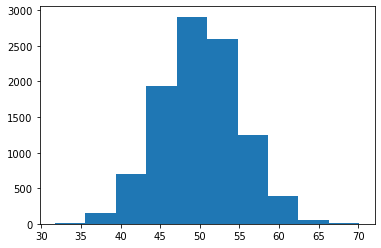

In [2]:
# generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# histogram of generated data
pyplot.hist(data)
pyplot.show()

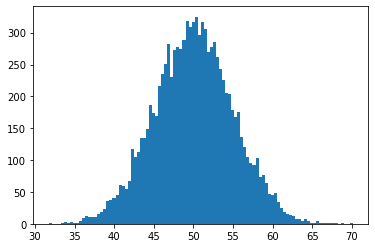

In [3]:
#generate a sample of random gaussians
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# histogram of generated data
pyplot.hist(data, bins=100)
pyplot.show()

# 4. Central Tendency:

The central tendency of a distribution refers to the middle or typical value in the distribution.
The most common or most likely value. In the Gaussian distribution, the central tendency is
called the mean, or more formally, the arithmetic mean, and is one of the two main parameters
that defines any Gaussian distribution. The mean of a sample is calculated as the sum of the
observations divided by the total number of observations in the sample.

Where xi is the ith observation from the dataset and n is the total number of observations.

The notation for the population mean is the Greek lower case letter mu (). The notation
for the sample mean is the variable with a bar above, such as x-bar (x). We can calculate the
mean of a sample by using the mean() NumPy function on an array.

In [4]:
# calculate the mean of a sample
from numpy.random import seed
from numpy.random import randn
from numpy import mean
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate mean
result = mean(data)
print('Mean: %.3f' % result)

Mean: 50.049


In [5]:
# calculate the median of a sample
from numpy.random import seed
from numpy.random import randn
from numpy import median
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate median
result = median(data)
print('Median: %.3f' % result)

Median: 50.042


# 5. Variance:

The variance of a distribution refers to how much on average that observations vary or dier
from the mean value. It is useful to think of the variance as a measure of the spread of a
distribution. A low variance will have values grouped around the mean (e.g. a narrow bell
shape), whereas a high variance will have values spread out from the mean (e.g. a wide bell
shape.) We can demonstrate this with an example, by plotting idealized Gaussians with low
and high variance. The complete example is listed below.

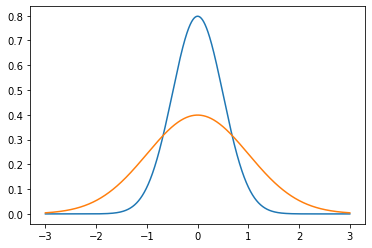

In [6]:
# generate and plot gaussians with different variance
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# x-axis for the plot
x_axis = arange(-3, 3, 0.001)
# plot low variance
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 0.5))
# plot high variance
pyplot.plot(x_axis, norm.pdf(x_axis, 0, 1))
pyplot.show()

In [7]:
# calculate the variance of a sample
from numpy.random import seed
from numpy.random import randn
from numpy import var
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate variance
result = var(data)
print('Variance: %.3f' % result)

Variance: 24.939


In [8]:
# calculate the standard deviation of a sample
from numpy.random import seed
from numpy.random import randn
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate standard deviation
result = std(data)
print('Standard Deviation: %.3f' % result)

Standard Deviation: 4.994


# 6. Describing a Gaussian:

In applied machine learning, you will often need to report the results of an algorithm. That is,
report the estimated skill of the model on out-of-sample data. This is often done by reporting
the mean performance from a k-fold cross-validation, or some other repeated sampling procedure.
When reporting model skill, you are in eect summarizing the distribution of skill scores, and
very likely the skill scores will be drawn from a Gaussian distribution.
It is common to only report the mean performance of the model. This would hide two
other important details of the distribution of the skill of the model. As a minimum I would
recommend reporting the two parameters of the Gaussian distribution of model scores and the
size of the sample. Ideally, it would also be a good idea to conrm that indeed the model skill
scores are Gaussian or look Gaussian enough to defend reporting the parameters of the Gaussian
distribution. This is important because the distribution of skill scores can be reconstructed by
readers and potentially compared to the skill of models on the same problem in the future.